# Workshop: Neural network on classification using machine failure dataset

Course: Predictive Analytics - Insights of Trends and Irregularities

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/predictive-analytics---insights-of-trends-and--irregularities/data-science

Contact: Tian Jing

Email: tianjing@nus.edu.sg

**How to run R in Colab**

- Login your Google Drive first.

- Then go to this URL: https://colab.research.google.com/#create=true&language=r, or this short URL https://colab.to/r. After accessing the URL, you will be taken to a new Colab notebook with the default title "Unitled.ipynb". If we check the “Runtime” settings of "Unitled.ipynb", and select “Change runtime type”, we will get a dialog confirming that we are already in R runtime for "Unitled.ipynb".

- You can save a copy of this "Unitled.ipynb" file in your Google Drive.

- In your Google Drive, open "Unitled.ipynb" using Colab.

- Select the "Files" menu at the left side, upload your data files (if any) into the folder "Files - sample_data" (not the Google Drive).

A detailed tutorial of Colab + R can be found at https://www.youtube.com/watch?v=XVfn6IpoUPU

In [ ]:
# Check R version used in Colab

print(R.version)


               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               


In [3]:
# Install Keras package so that we can build neural network models
install.packages("keras")
library(keras)
is_keras_available()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




[1] TRUE

In [1]:
# Load data files
data_train_orig = read.csv(file="/content/sample_data/data_failure_prediction_train.csv", header=TRUE, stringsAsFactors=FALSE, na.strings="na" )
data_test_orig = read.csv(file="/content/sample_data/data_failure_prediction_test.csv", header=TRUE, stringsAsFactors=FALSE, na.strings="na" )

# Data cleaning by set 'na' to be zero
#data_train_orig[is.na(data_train_orig)] = 0
#data_test_orig[is.na(data_test_orig)] = 0

numerical_columns_train <- sapply(data_train_orig, is.numeric)
data_train_orig[is.na(data_train_orig)] = colMeans(data_train_orig[, numerical_columns_train])
numerical_columns_test <- sapply(data_test_orig, is.numeric)
data_test_orig[is.na(data_test_orig)] = colMeans(data_test_orig[,numerical_columns_test])


# Split the training input (rest columns) and training output (the first column)
x_train_orig = data_train_orig[,2:ncol(data_train_orig)]
y_train_orig = data_train_orig[,1,drop=FALSE]
x_test_orig = data_test_orig[,2:ncol(data_test_orig)]
y_test_orig = data_test_orig[,1,drop=FALSE]

dim(x_train_orig)
dim(x_test_orig)

# Perform normalization on numerical data
x_train = scale(x_train_orig)
col_means_x_train = colMeans(x_train_orig)
col_stds_x_train = apply(x_train_orig, 2, sd)
x_test = scale(x_test_orig, center = col_means_x_train, scale = col_stds_x_train)

# Perform encoding for category data
y_train = (y_train_orig=="pos")
y_test = (y_test_orig=="pos")


Warning message in file(file, "rt"):
“cannot open file '/content/sample_data/data_failure_prediction_train.csv': No such file or directory”


ERROR: ignored

In [2]:
# Define the neural network model using the sequential API
model = keras_model_sequential() %>%
  layer_dense(units = 10, activation = "relu", input_shape = ncol(x_train)) %>%
  layer_dense(units = 4, activation = "relu") %>%
  layer_dense(units = ncol(y_train), activation = "sigmoid")

# Display the model summary
summary(model)


ERROR: ignored

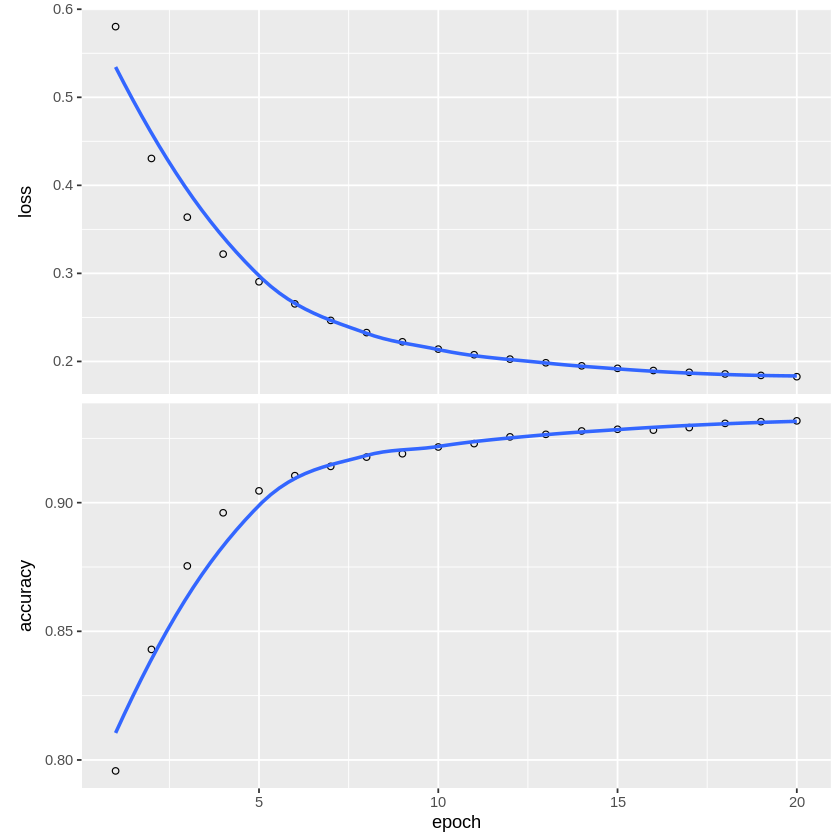

In [ ]:
# Build the model
keras::compile(model, loss = "binary_crossentropy", optimizer='sgd', metrics = "accuracy")

history = keras::fit(model, data.matrix(x_train), data.matrix(y_train), epochs = 20, batch_size = 100, verbose = 1)

plot(history)

In [ ]:
# Perform the model inference using the test data
y_pred_class = (predict(model2, x_test) > 0.5)
# dim(y_pred_class)

# Generate confusion matrix
y_test_class = (y_test_orig=="pos")
# dim(y_test_class)

table(y_test_class, y_pred_class)

sprintf("Accuracy: %.4f %%", mean(y_test_class == y_pred_class)*100)


            y_pred_class
y_test_class FALSE TRUE
       FALSE   996   36
       TRUE     47  328

[1] "Accuracy: 94.1009 %"

Model: "sequential_36"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_112 (Dense)                  (None, 20)                      3420        
 dense_111 (Dense)                  (None, 10)                      210         
 dense_110 (Dense)                  (None, 1)                       11          
Total params: 3641 (14.22 KB)
Trainable params: 3641 (14.22 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


            y_pred_class
y_test_class FALSE TRUE
       FALSE   993   39
       TRUE     40  335

[1] "Accuracy: 94.3852 %"

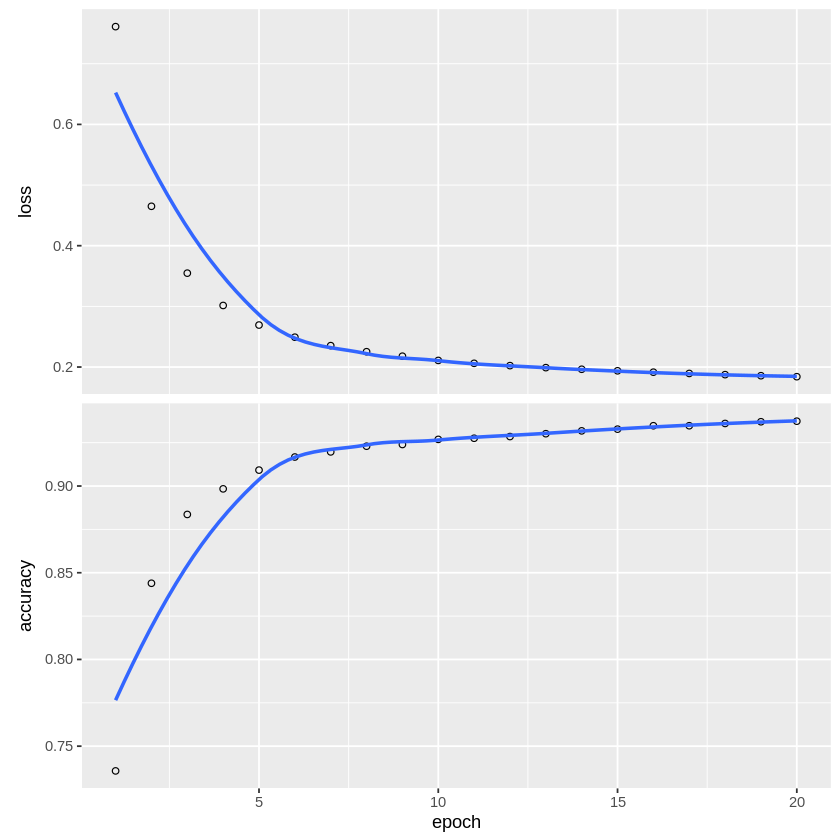

In [ ]:
# Model2
# Define the neural network model using the sequential API
model2 = keras_model_sequential() %>%
  layer_dense(units = 20, activation = "relu", input_shape = ncol(x_train)) %>%
  layer_dense(units = 10, activation = "relu") %>%
  layer_dense(units = ncol(y_train), activation = "sigmoid")

# add in learning rate
custom_learning_rate <- 0.001  # Change this to your desired learning rate
optimizer <- optimizer_adam(lr = custom_learning_rate)  # Specify the learning rate
model2 %>% compile(
  optimizer = optimizer,
  loss = 'categorical_crossentropy',  # Change to your desired loss function
  metrics = c('accuracy')  # Change to your desired metrics
)
# Display the model summary
summary(model2)

keras::compile(model2, loss = "binary_crossentropy", optimizer='sgd', metrics = "accuracy")

history = keras::fit(model2, data.matrix(x_train), data.matrix(y_train), epochs = 20, batch_size = 200, verbose = 1)

plot(history)

# Perform the model inference using the test data
y_pred_class = (predict(model2, x_test) > 0.5)
# dim(y_pred_class)

# Generate confusion matrix
y_test_class = (y_test_orig=="pos")
# dim(y_test_class)

table(y_test_class, y_pred_class)

sprintf("Accuracy: %.4f %%", mean(y_test_class == y_pred_class)*100)

**Discussions**

- Q1: How to change the neural network model architecture (e.g., # layers, # nodes, etc). How do these changes affect the model complexity (i.e., # trainable parameters)?

- Q2: Are you able to improve the model accuracy, compared to the original file downloaded from Canvas? What are your suggestions (or reflections) to improve the model accuracy?

In [ ]:
# Provide your answers to Q1 (no need to show the code here)
# more layers, more nodes increase trainable parameters
# 10, 4, 94.8117%
# 1, 94.5984%
# 20,4,2, 94.4543%, batchsize= 200 - 94.1009%
# Provide your answers to Q2 (no need to show the code here)
#
#
#


**Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file.**

Have a nice day!